In [1]:
# categorizing tweets by country/continent and time period (pre-pandemic and during-pandemic); 
# using statistical analysis and visualization to compare the number of mental health-related tweets across regions and time periods

import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from IPython.display import display
import sys
!{sys.executable} -m pip install pycountry
import pycountry

In [2]:
file_path = '/Users/amanda/Desktop/QSS20Project/covid_sample-0.0001.pkl' 
tweets = pd.read_pickle(file_path)
tweets

,tweetid,userid,screen_name,date,lang,location,place_id,place_url,place_type,place_name,...,rt_country,qtd_state,qtd_country,norm_country,norm_rt_country,norm_qtd_country,description,rt_user_description,qtd_user_description,acc_age
29075,1440152419048955908,1389342585823584263,josephc14074803,Tue Sep 21 03:14:28 +0000 2021,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"A Grateful Dead Head, Not a head that's dead. ...",NaN,NaN,NaN
17272,1347878795554918403,440160509,Iela_Strika,Sat Jan 09 12:12:01 +0000 2021,en,Malaysia--Pahang--Kuantan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38446,1271326636760162304,1022641129655742467,YngShvy,Fri Jun 12 06:21:04 +0000 2020,en,Outerspace,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16418,1279673408905756672,260230964,jennycoady10,Sun Jul 05 07:08:10 +0000 2020,en,"London, England",135989ad972a5d9d,https://api.twitter.com/1.1/geo/id/135989ad972...,city,Bromley,...,NaN,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN
53175,1342267014686109701,281225798,certezamente,Fri Dec 25 00:32:49 +0000 2020,en,Portugal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Portugal,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47554,1453744714730012677,19994423,dfarquha,Thu Oct 28 15:25:23 +0000 2021,en,"Denver, CO",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United States,NaN,NaN,Director of Government Affairs at NEHA. Adjunc...,NaN,NaN,NaN
10511,1221572642257481729,1109532876310302721,donkamion78,Sun Jan 26 23:16:28 +0000 2020,en,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161110,1477836631067566081,1285057167884722178,bIuesundae,Mon Jan 03 02:58:04 +0000 2022,en,21 white usa,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,how can i make this about shinee? she/her,NaN,NaN,531.0
11663,1496954995488419850,3320990612,JThomasOfficial,Thu Feb 24 21:07:37 +0000 2022,en,AZ,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United States,NaN,NaN,This is the official twitter for actor/filmmak...,#OAKLANDFIGHTCLUB #RootedinOakland #Dubnation ...,NaN,2380.0


In [3]:
print(tweets.head())
tweets.dropna(subset=['date', 'text', 'location'], inplace=True)

                   tweetid               userid      screen_name  \
29075  1440152419048955908  1389342585823584263  josephc14074803   
17272  1347878795554918403            440160509      Iela_Strika   
38446  1271326636760162304  1022641129655742467          YngShvy   
16418  1279673408905756672            260230964     jennycoady10   
53175  1342267014686109701            281225798     certezamente   

                                 date lang                   location  \
29075  Tue Sep 21 03:14:28 +0000 2021   en                        NaN   
17272  Sat Jan 09 12:12:01 +0000 2021   en  Malaysia--Pahang--Kuantan   
38446  Fri Jun 12 06:21:04 +0000 2020   en                 Outerspace   
16418  Sun Jul 05 07:08:10 +0000 2020   en            London, England   
53175  Fri Dec 25 00:32:49 +0000 2020   en                   Portugal   

               place_id                                          place_url  \
29075               NaN                                                NaN

In [4]:
#filter tweets
mental_health_keywords = ['anxiety', 'depress', 'sad', 'angry', 'cry', 'suicide', 'kms', 'kill myself', 'fml', 'fuck my life', 'anxious']

#relevancy 
tweets['relevant'] = tweets['text'].apply(lambda x: any(keyword in x.lower() for keyword in mental_health_keywords))
tweets = tweets[tweets['relevant']]
tweets

,tweetid,userid,screen_name,date,lang,location,place_id,place_url,place_type,place_name,...,qtd_state,qtd_country,norm_country,norm_rt_country,norm_qtd_country,description,rt_user_description,qtd_user_description,acc_age,relevant
6190,1356755137700777986,880319658,CWRUthinkbox,Wed Feb 03 00:03:26 +0000 2021,en,Cleveland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
11514,1455447215162290177,1731929600,flowerlikehana,Tue Nov 02 08:10:31 +0000 2021,en,ᵠⁱᵃⁿ ᵏᵘⁿ'ˢ 𝒽ℯ𝒶𝓇𝓉,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Han/Hana\n君にどれだけ愛されても\n\n僕の心臓は一つだけ,NaN,NaN,NaN,True
42659,1485484206646247425,1355193524715663366,GauriSh00526155,Mon Jan 24 05:26:48 +0000 2022,en,"New Delhi, India",NaN,NaN,NaN,NaN,...,NaN,NaN,India,NaN,NaN,justice for Sushant Singh Rajput\nI miss you S...,Fan of Sushant❤️\nSSR Alive in our hearts ❤️ f...,NaN,359.0,True
115429,1317871397469888512,942679554723852293,quaynor_mishael,Sun Oct 18 16:53:20 +0000 2020,en,Dansoman,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,True
16904,1351230216157487104,736537545576611840,valdo_80,Mon Jan 18 18:09:22 +0000 2021,en,"Texas, USA",NaN,NaN,NaN,NaN,...,NaN,NaN,United States,Ghana,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77168,1471834212340752384,1024060179388817408,GlennBeasley19,Fri Dec 17 13:26:36 +0000 2021,en,"Newtown, PA",NaN,NaN,NaN,NaN,...,NaN,NaN,United States,United States,NaN,Fighting for a bright future for my loves: my ...,Neighbor who ran to change the status quo. Pas...,NaN,1235.0,True
89824,1367246942187573253,1306987044426612736,gihfantas,Wed Mar 03 22:54:07 +0000 2021,en,neon gravestones,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
103545,1475703159636983808,1211546224181932034,histonomer,Tue Dec 28 05:40:25 +0000 2021,in,"Kuala Lumpur City, Kuala Lumpur Federal Territory",NaN,NaN,NaN,NaN,...,NaN,NaN,Malaysia,NaN,NaN,nerdy biologist • he • studying español • Mala...,NaN,NaN,728.0,True
101112,1292306976207060993,303763237,saipavan0510,Sun Aug 09 03:49:27 +0000 2020,en,"Hyderabad, India",NaN,NaN,NaN,NaN,...,NaN,NaN,India,India,NaN,NaN,NaN,NaN,NaN,True


In [5]:
%matplotlib inline

In [6]:
tweets = tweets.copy() 
tweets['date'] = pd.to_datetime(tweets['date'], format='%a %b %d %H:%M:%S %z %Y', errors='coerce')

tweets['date'] = tweets['date'].dt.tz_localize(None)

pandemic_start = pd.Timestamp('2020-03-01')

#classify the period based on the pandemic start date
tweets['period'] = tweets['date'].apply(lambda x: 'pre-pandemic' if x < pandemic_start else 'during-pandemic')

display(tweets[['date', 'period']].head())

,date,period
6190,2021-02-03 00:03:26,during-pandemic
11514,2021-11-02 08:10:31,during-pandemic
42659,2022-01-24 05:26:48,during-pandemic
115429,2020-10-18 16:53:20,during-pandemic
16904,2021-01-18 18:09:22,during-pandemic


In [11]:
import pandas as pd
import pycountry

def extract_country(location):
    if not isinstance(location, str): 
        return None
    components = location.split(',')
    if len(components) < 2: ]
        return None
    country_name = components[-1].strip()
    try:
        country = pycountry.countries.search_fuzzy(country_name)
        return country[0].name 
    except Exception as e:
        print(f"Failed to match country: {country_name}, Error: {e}")
        return None

tweets['country'] = tweets['location'].apply(extract_country)

tweets = tweets[tweets['country'].notna()]

country_period_group = tweets.groupby(['country', 'period']).size().unstack(fill_value=0)

print(country_period_group.head(10)) 


period      during-pandemic  pre-pandemic
country                                  
Albania                   1             0
Antarctica                1             0
Argentina                 4             0
Australia                23             0
Azerbaijan               11             0
Bangladesh                2             0
Belgium                   1             0
Botswana                  2             0
Brazil                    3             0
Cabo Verde                1             0


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

country_totals = country_period_group.sum(axis=1).sort_values(ascending=False)
top_10_countries = country_totals.head(10).index

top_10_data = country_period_group.loc[top_10_countries]

<Figure size 1500x800 with 0 Axes>

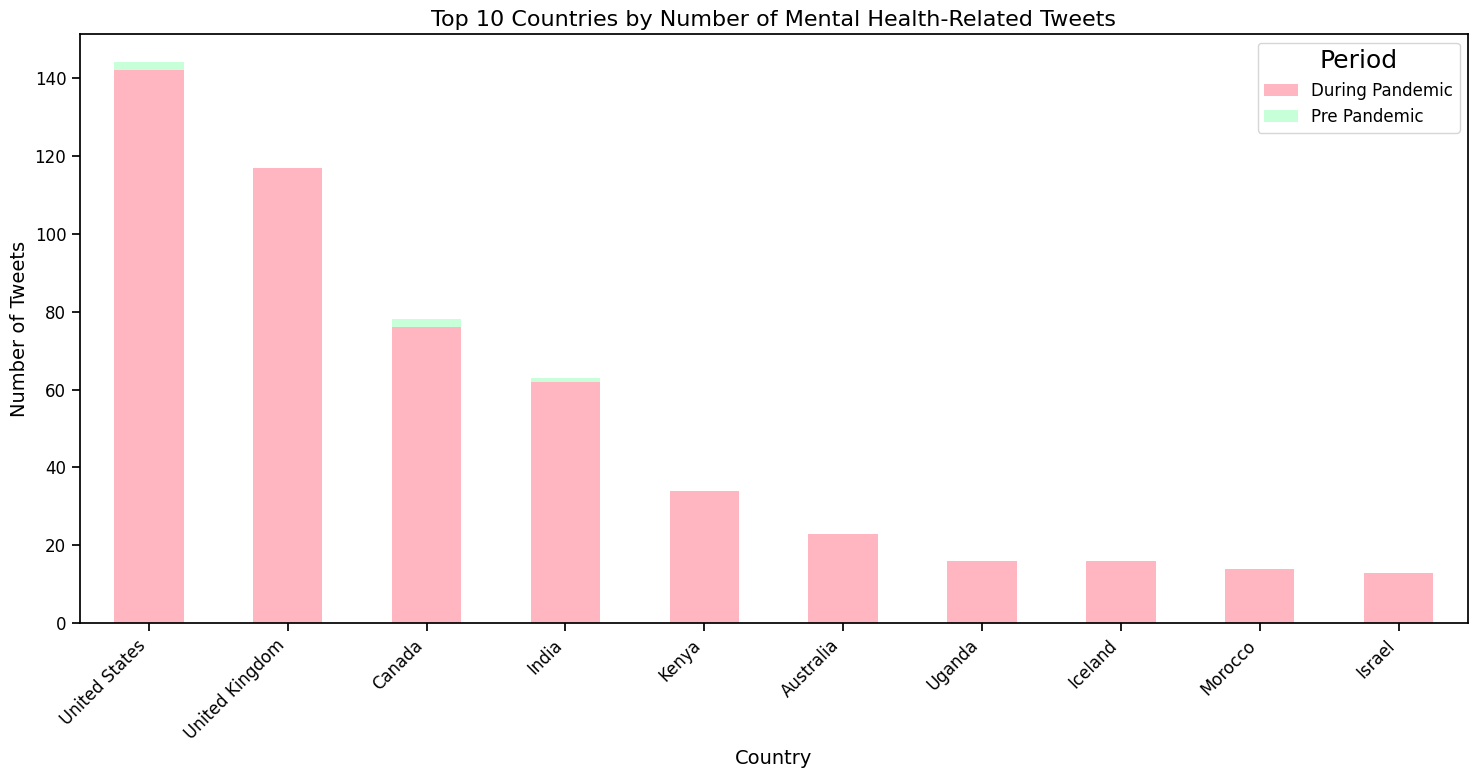

In [43]:
plt.figure(figsize=(15, 8)) 
top_10_data.plot(kind='bar', stacked=True, color=['#FFB6C1', '#c7ffd8'], figsize=(15, 8))
plt.title('Top 10 Countries by Number of Mental Health-Related Tweets', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12) 
plt.yticks(fontsize=12)
plt.legend(['During Pandemic','Pre Pandemic'], title='Period', fontsize=12)

plt.tight_layout() 

save_path = '/Users/amanda/Desktop/QSS20Project/mental_health_tweets_by_country.png'
plt.savefig(save_path)

plt.show() 


In [29]:
continent_map = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

country_to_continent = {country: continent for continent, countries in continent_map.items() for country in countries}

# map each country to its continent
tweets['continent'] = tweets['country'].apply(lambda country: country_to_continent.get(country))

tweets.dropna(subset=['continent'], inplace=True)

continent_period_group = tweets.groupby(['continent', 'period']).size().unstack(fill_value=0)

display(continent_period_group)

period,during-pandemic,pre-pandemic
continent,,
Africa,99,1
Asia,120,2
Europe,202,0
North America,238,4
Oceania,25,0
South America,19,0


<Figure size 1500x800 with 0 Axes>

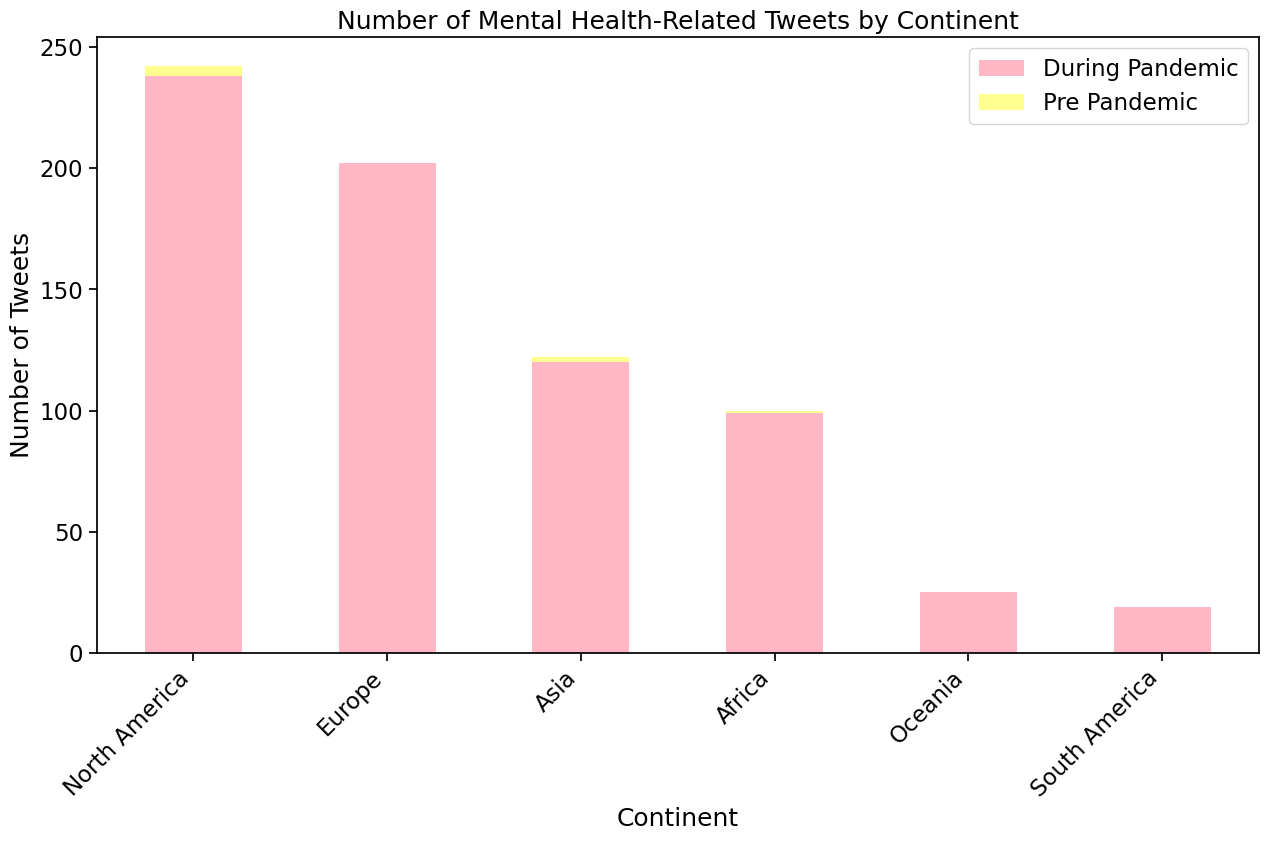

In [44]:
continent_totals = continent_period_group.sum(axis=1).sort_values(ascending=False)
sorted_continent_data = continent_period_group.loc[continent_totals.index]

plt.figure(figsize=(15, 8))
plt.rcParams.update({'font.size': 14})  

sorted_continent_data.plot(kind='bar', stacked=True,  color=['#ffb7c5', '#ffff90'],figsize=(15, 8))
plt.title('Number of Mental Health-Related Tweets by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Tweets')
plt.legend(['During Pandemic', 'Pre Pandemic'])

plt.xticks(rotation=45, ha='right') 

save_path = '/Users/amanda/Desktop/QSS20Project/mental_health_tweets_by_continent.png'
plt.savefig(save_path)

plt.show() 

In [41]:
# Statistical Analysis across Country 

import pandas as pd
from scipy.stats import chi2_contingency, chi2

contingency_table = pd.crosstab(tweets['period'], tweets['country'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05 
chi2_critical = chi2.ppf(1 - alpha, dof)

print(f'Chi-square statistic: {chi2_stat}')
print(f'Degrees of freedom: {dof}')
print(f'Chi-square critical value (95% confidence): {chi2_critical}')
print(f'Expected frequencies: \n{expected}')
print(f'P-value: {p_value}')

if p_value < alpha:
    significance = "Significant result, reject the null hypothesis: There is a significant difference in the number of mental health-related tweets across countries in different periods."
else:
    significance = "Not a significant result, cannot reject the null hypothesis: There is no significant difference in the number of mental health-related tweets across countries in different periods."
print(significance)

summary_data = {
    "Statistic": ["Chi-square statistic", "Degrees of freedom", "Chi-square critical value (95% confidence)", "P-value"],
    "Value": [chi2_stat, dof, chi2_critical, p_value],
    "Interpretation": [
        "Indicates the deviation from expected frequencies", 
        "Calculated based on the number of categories minus one", 
        "Threshold for significance at 95% confidence", 
        "Probability of observing such extreme statistic under the null hypothesis"
    ]
}

summary_table = pd.DataFrame(summary_data)

summary_table["Summary"] = summary_table.apply(lambda row: f"{row['Statistic']}: {row['Value']} - {row['Interpretation']}", axis=1)

print("\nSummary Table:")
for summary in summary_table["Summary"]:
    print(summary)

interpretation = "This is consistent with the p-value which is greater than the significance level." if p_value > alpha else "This is further confirmed by the p-value which is less than the significance level."
print(interpretation)


Chi-square statistic: 74.36204981317765
Degrees of freedom: 63
Chi-square critical value (95% confidence): 82.5287265414718
Expected frequencies: 
[[9.90140845e-01 3.96056338e+00 2.27732394e+01 1.08915493e+01
  1.98028169e+00 9.90140845e-01 1.98028169e+00 2.97042254e+00
  9.90140845e-01 7.72309859e+01 2.97042254e+00 9.90140845e-01
  4.95070423e+00 1.98028169e+00 9.90140845e-01 4.95070423e+00
  1.28718310e+01 6.93098592e+00 9.90140845e-01 6.93098592e+00
  1.98028169e+00 9.90140845e-01 1.58422535e+01 6.23788732e+01
  3.96056338e+00 3.96056338e+00 1.28718310e+01 3.96056338e+00
  9.90140845e-01 9.90140845e-01 3.36647887e+01 9.90140845e-01
  9.90140845e-01 9.90140845e+00 9.90140845e-01 6.93098592e+00
  1.98028169e+00 4.95070423e+00 1.38619718e+01 9.90140845e-01
  1.98028169e+00 5.94084507e+00 1.08915493e+01 1.08915493e+01
  9.90140845e-01 9.90140845e-01 7.92112676e+00 2.97042254e+00
  1.98028169e+00 2.97042254e+00 2.97042254e+00 4.95070423e+00
  5.94084507e+00 9.90140845e-01 9.90140845e-01 

In [42]:
#continent:

import pandas as pd
from scipy.stats import chi2_contingency, chi2

contingency_table = pd.crosstab(tweets['period'], tweets['continent'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05 
chi2_critical = chi2.ppf(1 - alpha, dof)

print(f'Chi-square statistic: {chi2_stat}')
print(f'Degrees of freedom: {dof}')
print(f'Chi-square critical value (95% confidence): {chi2_critical}')
print(f'Expected frequencies: \n{expected}')
print(f'P-value: {p_value}')


if p_value < alpha:
    significance = "Significant result, reject the null hypothesis: There is a significant difference in the number of mental health-related tweets across continents in different periods."
else:
    significance = "Not a significant result, cannot reject the null hypothesis: There is no significant difference in the number of mental health-related tweets across continents in different periods."
print(significance)


summary_data = {
    "Statistic": ["Chi-square statistic", "Degrees of freedom", "Chi-square critical value (95% confidence)", "P-value"],
    "Value": [chi2_stat, dof, chi2_critical, p_value],
    "Interpretation": [
        "Indicates the deviation from expected frequencies", 
        "Calculated based on the number of categories minus one", 
        "Threshold for significance at 95% confidence", 
        "Probability of observing such extreme statistic under the null hypothesis"
    ]
}

summary_table = pd.DataFrame(summary_data)


summary_table["Summary"] = summary_table.apply(lambda row: f"{row['Statistic']}: {row['Value']} - {row['Interpretation']}", axis=1)


print("\nSummary Table:")
for summary in summary_table["Summary"]:
    print(summary)

interpretation = "This is consistent with the p-value which is greater than the significance level." if p_value > alpha else "This is further confirmed by the p-value which is less than the significance level."
print(interpretation)


Chi-square statistic: 4.086119583884115
Degrees of freedom: 5
Chi-square critical value (95% confidence): 11.070497693516351
Expected frequencies: 
[[9.90140845e+01 1.20797183e+02 2.00008451e+02 2.39614085e+02
  2.47535211e+01 1.88126761e+01]
 [9.85915493e-01 1.20281690e+00 1.99154930e+00 2.38591549e+00
  2.46478873e-01 1.87323944e-01]]
P-value: 0.537084715105794
Not a significant result, cannot reject the null hypothesis: There is no significant difference in the number of mental health-related tweets across continents in different periods.

Summary Table:
Chi-square statistic: 4.086119583884115 - Indicates the deviation from expected frequencies
Degrees of freedom: 5.0 - Calculated based on the number of categories minus one
Chi-square critical value (95% confidence): 11.070497693516351 - Threshold for significance at 95% confidence
P-value: 0.537084715105794 - Probability of observing such extreme statistic under the null hypothesis
This is consistent with the p-value which is great